In [1]:
import numpy as np
import pandas as pd
from qiskit.quantum_info import SparsePauliOp
from susy_qm import calculate_wz_hamiltonian
from wesszumino import build_wz_hamiltonian
import pennylane as qml

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import os

In [2]:
# Parameters
N = 3
a = 1.0
c = -0.2
#potential = 'quadratic'
potential = "linear"
boundary_condition = 'dirichlet'
#boundary_condition = 'periodic'

In [ ]:
cutoffs = [4]
for cutoff in cutoffs:

    print(cutoff, N, a, potential, boundary_condition, c)
    H_pauli, num_qubits = build_wz_hamiltonian(
        cutoff,
        N,
        a,
        c=c,
        m=1.0,
        potential=potential,
        boundary_condition=boundary_condition,
        remove_zero_terms=True
    )
    H = qml.matrix(H_pauli, wire_order=range(num_qubits))
        
    eigenvalues, eigenvectors = np.linalg.eig(H)
    min_eigenvalue = min(eigenvalues.real)
    min_index = np.argmin(eigenvalues)
    min_eigenvalue = eigenvalues[min_index]
    min_eigenvector = np.asarray(eigenvectors[:, min_index])

    active_indices = [i for i, val in enumerate(min_eigenvector) if abs(val) > 1e-8]
    states = [format(i, f'0{num_qubits}b') for i in active_indices]
    print("Active basis states:")
    for s in states:
        print(s)

    print('##########################################')


4 3 1.0 linear dirichlet -0.8
0.0001174636806397353
[ 7.68491616e-21+0.j  2.51094645e-17+0.j  8.33475877e-18+0.j
  7.28470351e-17+0.j  2.13098602e-01+0.j -7.79624932e-17+0.j
 -7.63824589e-03+0.j  3.17884815e-17+0.j  2.87987478e-17+0.j
 -2.30462997e-17+0.j  1.20441716e-17+0.j  8.74051148e-19+0.j
 -1.11022302e-16+0.j -2.08166817e-17+0.j -1.04083409e-17+0.j
 -6.93889390e-18+0.j -9.83920814e-18+0.j  1.11456727e-19+0.j
 -3.77338203e-19+0.j -3.02968069e-18+0.j -1.49937491e-02+0.j
  1.35188293e-17+0.j  5.37431691e-04+0.j  8.30953713e-18+0.j
 -2.07091460e-18+0.j  1.60245436e-18+0.j -2.41380863e-18+0.j
  1.94233264e-19+0.j  1.06497308e-18+0.j  3.58723627e-19+0.j
  5.29616058e-19+0.j -2.77000319e-19+0.j -9.48180046e-01+0.j
  2.08342383e-16+0.j  3.39862967e-02+0.j -6.23335660e-17+0.j
 -5.16987883e-26+0.j  6.46234854e-26+0.j  1.29246971e-26+0.j
 -4.84676140e-27+0.j  3.82102810e-18+0.j  1.02305581e-18+0.j
  1.27907861e-18+0.j -8.13031930e-19+0.j -1.89326617e-29+0.j
 -4.73316543e-30+0.j -1.18329136e

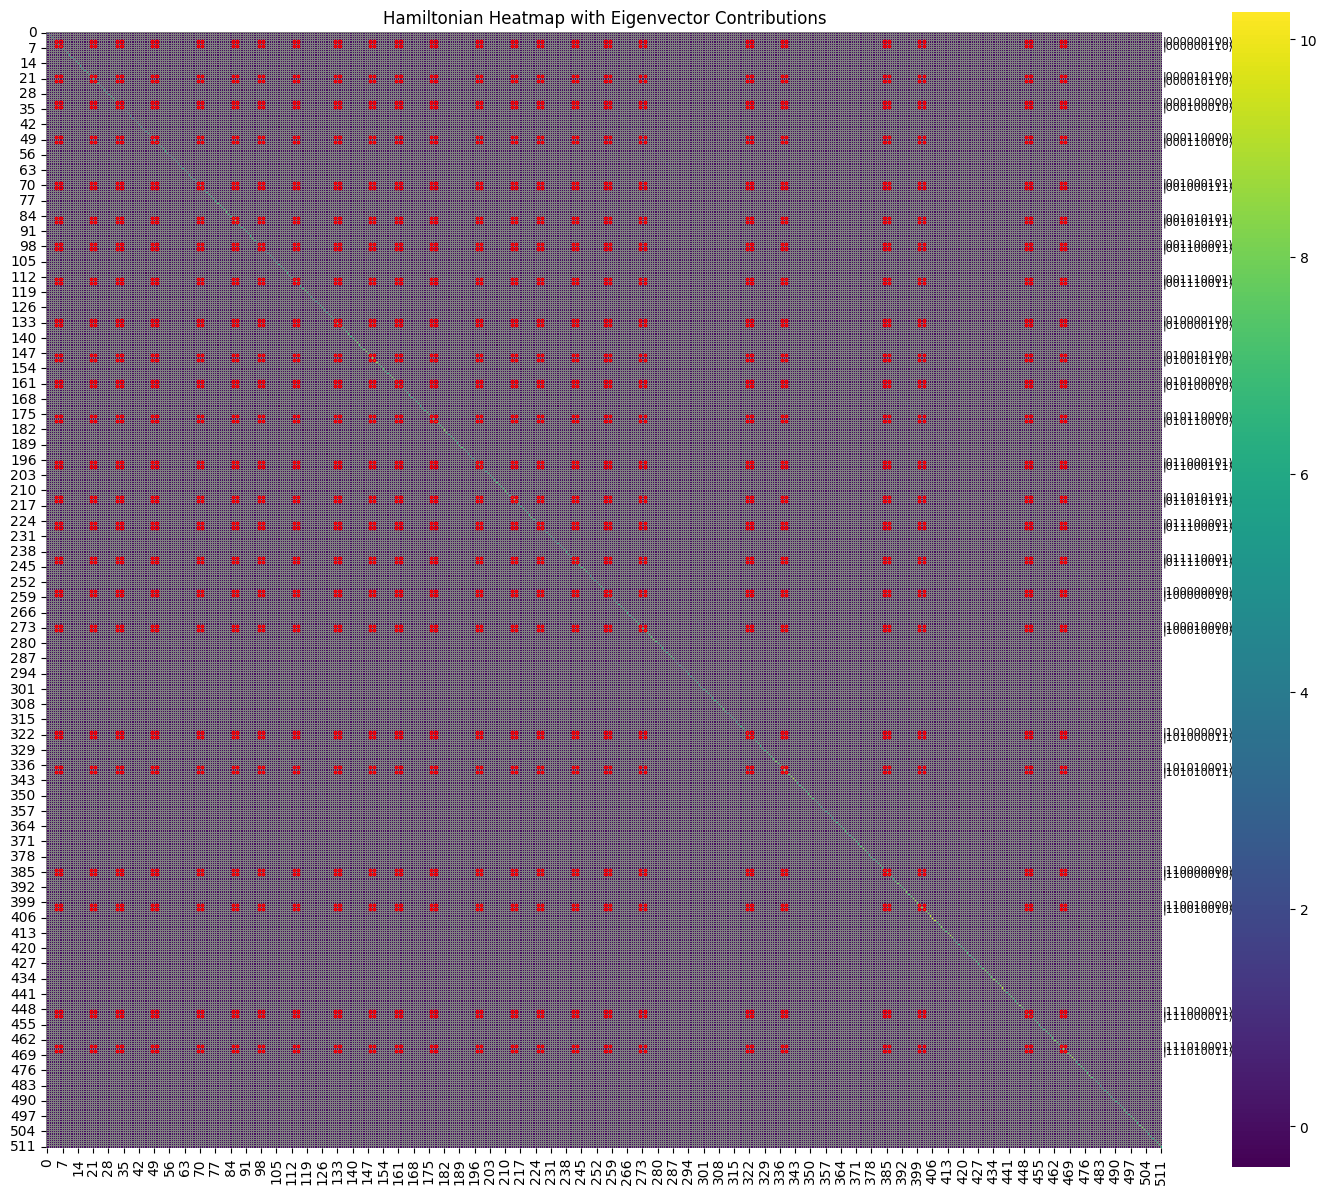

In [9]:
# Parameters
N = 3
a = 1.0
c = -0.8
#potential = 'quadratic'
potential = "linear"
boundary_condition = 'dirichlet'
#boundary_condition = 'periodic'

cutoffs = [4]
for cutoff in cutoffs:

    print(cutoff, N, a, potential, boundary_condition, c)
    H_pauli, num_qubits = build_wz_hamiltonian(
        cutoff,
        N,
        a,
        c=c,
        m=1.0,
        potential=potential,
        boundary_condition=boundary_condition,
        remove_zero_terms=True
    )
    H = qml.matrix(H_pauli, wire_order=range(num_qubits))
        
    eigenvalues, eigenvectors = np.linalg.eigh(H)
    min_index = np.argmin(eigenvalues)
    min_eigenvector = np.asarray(eigenvectors[:, min_index])

    print(eigenvalues[min_index])
    print(min_eigenvector)

    df = pd.DataFrame(H.real)
    active_indices = [i for i, val in enumerate(min_eigenvector) if abs(val) > 1e-8]

    plt.figure(figsize=(18, 15))
    ax = sns.heatmap(df, cmap='viridis', cbar=True, annot=False, linewidths=0.5, linecolor='gray', square=True)

    for i in active_indices:
        for j in active_indices:
            rect = patches.Rectangle(
                (j, i), 1, 1, fill=False, edgecolor='red', linewidth=1
            )
            ax.add_patch(rect)

    eigvec = min_eigenvector.real.flatten()
    #for i in range(len(eigvec)):
    for i in active_indices:
        basis = format(i, f'0{num_qubits}b')
        label = f"|{basis}⟩"#: {eigvec[i].real:.2f}"
        ax.text(df.shape[1] + 0.2, i + 0.5, label, va='center', ha='left', color='black', fontsize=8)

    plt.title("Hamiltonian Heatmap with Eigenvector Contributions")
    plt.show()

    if potential == 'quadratic':
        folder = 'C' + str(abs(c)) + '/' + 'N'+ str(N)
    else:
        folder = 'N'+ str(N)

    #save_path = os.path.join(r"C:\Users\Johnk\Documents\PhD\Quantum Computing Code\Quantum-Computing\SUSY\Wess-Zumino\EigenvectorChecks\Heatmaps\BasisStates", boundary_condition, potential, folder)
    #os.makedirs(save_path, exist_ok=True)
    #plt.savefig(save_path + f"\\heatmap_{cutoff}")


In [7]:
cutoffs = [4]
for cutoff in cutoffs:

    print(cutoff, N, a, potential, boundary_condition, c)
    H = calculate_wz_hamiltonian(cutoff, N, a, potential, boundary_condition, c)
    hamiltonian = SparsePauliOp.from_operator(H)
    num_qubits = hamiltonian.num_qubits
        
    eigenvalues, eigenvectors = np.linalg.eig(H)
    min_eigenvalue = min(eigenvalues.real)
    min_index = np.argmin(eigenvalues)
    min_eigenvalue = eigenvalues[min_index]
    min_eigenvector = np.asarray(eigenvectors[:, min_index])

    active_indices = [i for i, val in enumerate(min_eigenvector) if abs(val) > 1e-8]
    states = [format(i, f'0{num_qubits}b') for i in active_indices]
    print("Active basis states:")
    for s in states:
        print(s)

    print('##########################################')


4 2 1.0 linear dirichlet -0.2
Active basis states:
010000
010010
011000
011010
100000
100010
101000
101010
##########################################


In [7]:
num_qubits

9

In [8]:
min_eigenvalue

np.complex128(0.00011746368064371616+0j)

4 3 1.0 linear dirichlet -0.8


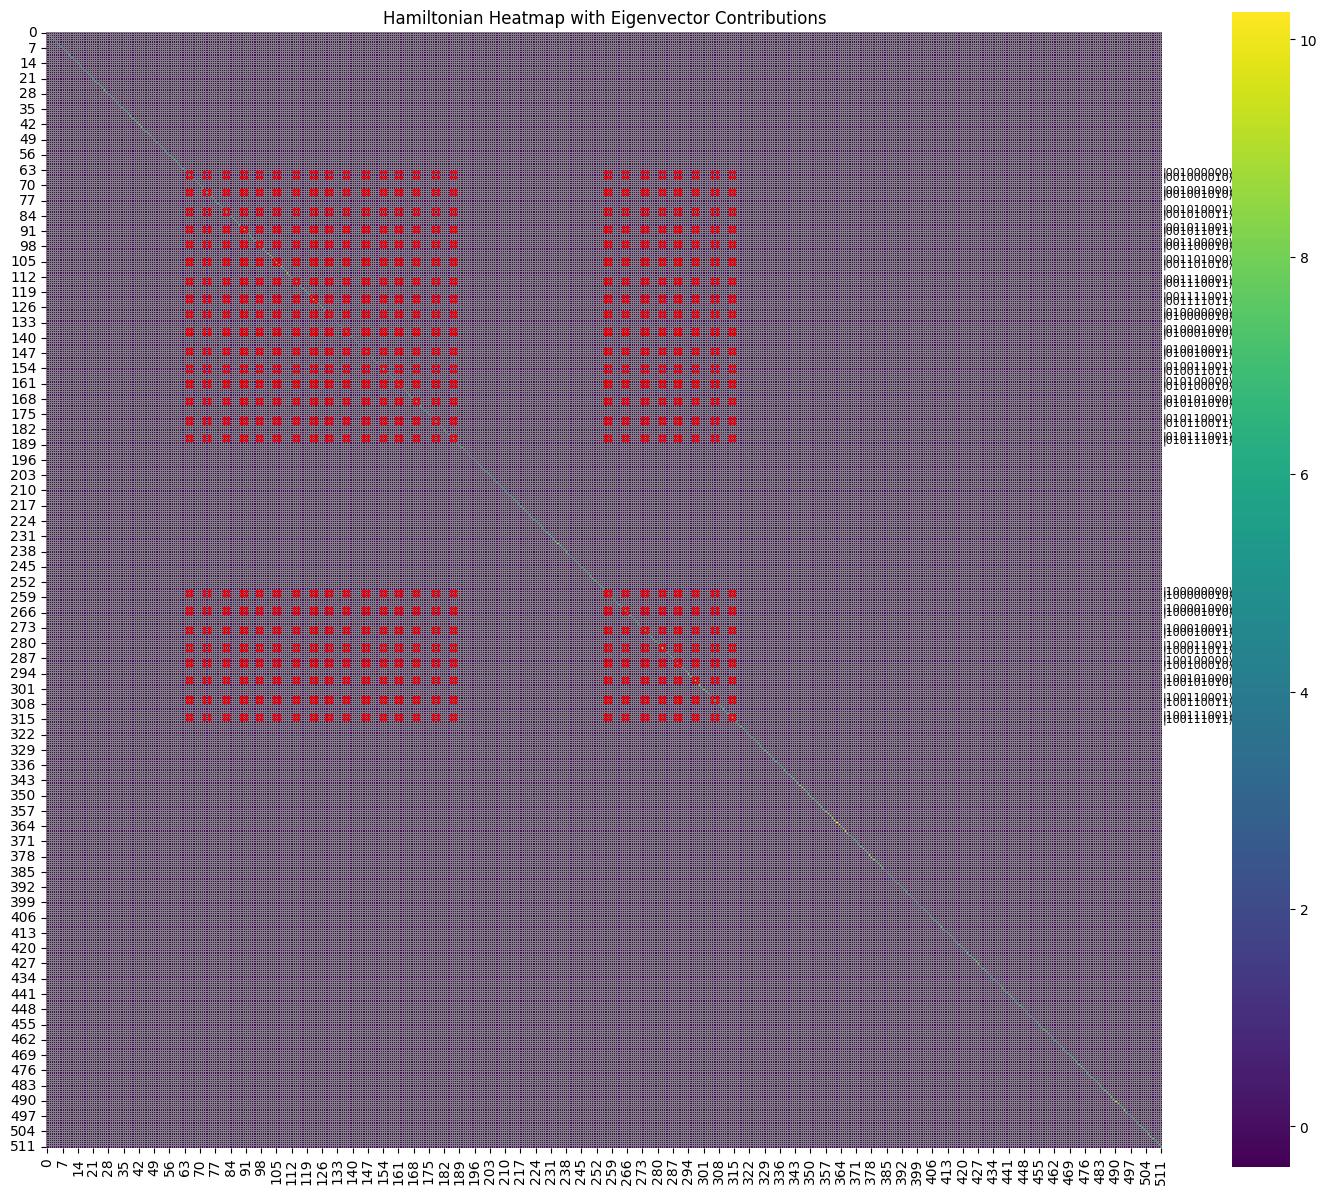

In [7]:
# Parameters
N = 3
a = 1.0
c = -0.8
#potential = 'quadratic'
potential = "linear"
boundary_condition = 'dirichlet'
#boundary_condition = 'periodic'

cutoffs = [4]
for cutoff in cutoffs:

    print(cutoff, N, a, potential, boundary_condition, c)
    H = calculate_wz_hamiltonian(cutoff, N, a, potential, boundary_condition, c)
    hamiltonian = SparsePauliOp.from_operator(H)
    num_qubits = hamiltonian.num_qubits
        
    eigenvalues, eigenvectors = np.linalg.eig(H)
    min_index = np.argmin(eigenvalues)
    min_eigenvector = np.asarray(eigenvectors[:, min_index])

    df = pd.DataFrame(H.real)
    active_indices = [i for i, val in enumerate(min_eigenvector) if abs(val) > 1e-8]

    plt.figure(figsize=(18, 15))
    ax = sns.heatmap(df, cmap='viridis', cbar=True, annot=False, linewidths=0.5, linecolor='gray', square=True)

    for i in active_indices:
        for j in active_indices:
            rect = patches.Rectangle(
                (j, i), 1, 1, fill=False, edgecolor='red', linewidth=1
            )
            ax.add_patch(rect)

    eigvec = min_eigenvector.real.flatten()
    #for i in range(len(eigvec)):
    for i in active_indices:
        basis = format(i, f'0{num_qubits}b')
        label = f"|{basis}⟩"#: {eigvec[i].real:.2f}"
        ax.text(df.shape[1] + 0.2, i + 0.5, label, va='center', ha='left', color='black', fontsize=8)

    plt.title("Hamiltonian Heatmap with Eigenvector Contributions")
    #plt.show()

    if potential == 'quadratic':
        folder = 'C' + str(abs(c)) + '/' + 'N'+ str(N)
    else:
        folder = 'N'+ str(N)

    save_path = os.path.join(r"C:\Users\Johnk\Documents\PhD\Quantum Computing Code\Quantum-Computing\SUSY\Wess-Zumino\EigenvectorChecks\Heatmaps\BasisStates", boundary_condition, potential, folder)
    os.makedirs(save_path, exist_ok=True)
    plt.savefig(save_path + f"\\heatmap_{cutoff}")


In [50]:
def highlight_nonzero(val):
    return 'background-color: green' if val != 0 else ''

df = pd.DataFrame(H.real)
df = df.style.map(highlight_nonzero).format(precision=1)
#df


In [52]:
active_indices = [i for i, val in enumerate(min_eigenvector) if abs(val) > 1e-8]
df = pd.DataFrame(H.real)

def highlight_active_contribution(val, row_idx, col_idx):
    if row_idx in active_indices and col_idx in active_indices:
        return 'background-color: green'
    return ''

styled_df = df.style.apply(
    lambda data: np.vectorize(highlight_active_contribution)(data, *np.indices(data.shape)),
    axis=None
).format("{:.1f}")

styled_df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,2.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,2.1,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
min_eigenvector.real.flatten()

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.97324899,
        0.        ,  0.        ,  0.        , -0.22975292,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ])